In [9]:
%load_ext autoreload
%autoreload 2

from preprocess import *
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical

# Second dimension of the feature is dim2
feature_dim_2 = 11

# Save data to array file first
save_data_to_array(max_len=feature_dim_2)

# # Loading train set and test set
X_train, X_test, y_train, y_test = get_train_test()

# # Feature dimension
feature_dim_1 = 20
channel = 1
epochs = 75
batch_size = 100
verbose = 1
num_classes = 4

# Reshaping to perform 2D convolution
X_train = X_train.reshape(X_train.shape[0], feature_dim_1, feature_dim_2, channel)
X_test = X_test.reshape(X_test.shape[0], feature_dim_1, feature_dim_2, channel)

y_train_hot = to_categorical(y_train)
y_test_hot = to_categorical(y_test)

Saving vectors of label - 'cat': 100%|██████████| 264/264 [00:01<00:00, 234.67it/s]


In [10]:
def get_model():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(2, 2), activation='relu', input_shape=(feature_dim_1, feature_dim_2, channel)))
    model.add(Conv2D(48, kernel_size=(2, 2), activation='relu'))
    model.add(Conv2D(120, kernel_size=(2, 2), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.25))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])
    return model

# Predicts one sample
def predict(filepath, model):
    sample = wav2mfcc(filepath)
    sample_reshaped = sample.reshape(1, feature_dim_1, feature_dim_2, channel)
    return get_labels()[0][
            np.argmax(model.predict(sample_reshaped))
    ]

# Building The Model Then Training it

In [11]:
model = get_model()
model.fit(X_train, y_train_hot, batch_size=batch_size, epochs=epochs, verbose=verbose, validation_data=(X_test, y_test_hot))

Train on 625 samples, validate on 417 samples
Epoch 1/75
625/625 [==============================] - 2s 4ms/step - loss: 3.6703 - acc: 0.2896 - val_loss: 1.3645 - val_acc: 0.3141
Epoch 2/75
625/625 [==============================] - 0s 678us/step - loss: 1.3224 - acc: 0.4320 - val_loss: 0.9381 - val_acc: 0.5540
Epoch 3/75
625/625 [==============================] - 0s 688us/step - loss: 1.0875 - acc: 0.5088 - val_loss: 0.8170 - val_acc: 0.6978
Epoch 4/75
625/625 [==============================] - 0s 702us/step - loss: 0.9339 - acc: 0.5856 - val_loss: 0.6740 - val_acc: 0.7914
Epoch 5/75
625/625 [==============================] - 0s 684us/step - loss: 0.8555 - acc: 0.6416 - val_loss: 1.0423 - val_acc: 0.4820
Epoch 6/75
625/625 [==============================] - 0s 684us/step - loss: 0.8248 - acc: 0.6224 - val_loss: 0.6280 - val_acc: 0.7146
Epoch 7/75
625/625 [==============================] - 0s 705us/step - loss: 0.7500 - acc: 0.6944 - val_loss: 0.5848 - val_acc: 0.7650
Epoch 8/75
625/625

## Prediction

In [92]:
# teste audio 
import random

number_audios_classified = {"cat": 0, "happy": 0, "bed": 0, "maconha": 0}
count_audios_with_term = 0

files_dir = os.listdir('./teste_audio')

random.shuffle(files_dir)

for audio in files_dir:
    prediction = predict('./teste_audio/' + audio, model=model)
    number_audios_classified[prediction] += 1
    print('audio: ' + audio + ' é classificado como: ' + prediction)
    count_audios_with_term += 1


audio: Clipe 258 é classificado como: maconha
audio: Clipe 264 é classificado como: cat
audio: Clipe 257 é classificado como: happy
audio: Clipe 261 é classificado como: happy
audio: Clipe 254 é classificado como: maconha
audio: Clipe 255 é classificado como: maconha
audio: Clipe 263 é classificado como: maconha
audio: Clipe 262 é classificado como: maconha
audio: Clipe 260 é classificado como: maconha
audio: Clipe 259 é classificado como: maconha


In [107]:
import numpy as np

sum_false_negative = np.sum([number_audios_classified[i] for i in number_audios_classified if i is not 'maconha']) 
print('Número de falso negativos: ' + str(sum_false_negative))
print('Total de audios: %d'%(count_audios_with_term))
print('Taxa de falso negativo: ' + str((sum_false_negative / count_audios_with_term) * 100) + '%')


Número de falso negativos: 3
Total de audios: 10
Taxa de falso negativo: 30.0%


In [94]:
import os

number_audios_classified_2 = {"cat": 0, "happy": 0, "bed": 0, "maconha": 0}
count_audios_no_term = 0 

# files from directorie whatsapp
files_dir = os.listdir('/home/captain-rogers/Área de Trabalho/whatsapp/audios')

for audio in files_dir:
    concat_audio_path = '/home/captain-rogers/Área de Trabalho/whatsapp/audios/' + audio 
    
    prediction = predict(concat_audio_path, model=model)
    
    number_audios_classified_2[prediction] += 1 
    
    print('audio: ' + audio + ' é classificado como: ' + prediction)
    count_audios_no_term += 1
    
print(number_audios_classified_2)

audio: PTT-20181109-WA0125.opus é classificado como: cat
audio: PTT-20180926-WA0087.opus é classificado como: maconha
audio: PTT-20181026-WA0113.opus é classificado como: maconha
audio: PTT-20181030-WA0099.opus é classificado como: bed
audio: PTT-20181109-WA0072.opus é classificado como: maconha
audio: PTT-20181021-WA0028.opus é classificado como: cat
audio: PTT-20181109-WA0021.opus é classificado como: cat
audio: PTT-20181101-WA0006.opus é classificado como: cat
audio: PTT-20180929-WA0012.opus é classificado como: cat
audio: PTT-20180907-WA0005.opus é classificado como: cat
audio: PTT-20181109-WA0016.opus é classificado como: bed
audio: PTT-20181101-WA0171.opus é classificado como: happy
audio: PTT-20181109-WA0144.opus é classificado como: happy
audio: PTT-20181105-WA0037.opus é classificado como: cat
audio: PTT-20181024-WA0065.opus é classificado como: happy
audio: PTT-20181026-WA0114.opus é classificado como: cat
audio: PTT-20181009-WA0172.opus é classificado como: happy
audio: PTT-

audio: PTT-20181109-WA0083.opus é classificado como: happy
audio: PTT-20181006-WA0035.opus é classificado como: happy
audio: PTT-20180913-WA0049.opus é classificado como: happy
audio: PTT-20181030-WA0105.opus é classificado como: cat
audio: PTT-20181101-WA0120.opus é classificado como: cat
audio: PTT-20181029-WA0025.opus é classificado como: bed
audio: PTT-20181109-WA0073.opus é classificado como: bed
audio: PTT-20181009-WA0173.opus é classificado como: bed
audio: PTT-20181102-WA0115.opus é classificado como: happy
audio: PTT-20181019-WA0048.opus é classificado como: cat
audio: PTT-20181108-WA0011.opus é classificado como: cat
audio: PTT-20180908-WA0071.opus é classificado como: bed
audio: PTT-20180911-WA0054.opus é classificado como: maconha
audio: PTT-20181026-WA0131.opus é classificado como: cat
audio: PTT-20180927-WA0006.opus é classificado como: happy
audio: PTT-20181101-WA0140.opus é classificado como: bed
audio: PTT-20180908-WA0073.opus é classificado como: happy
audio: PTT-2018

audio: PTT-20181109-WA0041.opus é classificado como: happy
audio: PTT-20181028-WA0103.opus é classificado como: happy
audio: PTT-20181002-WA0018.opus é classificado como: happy
audio: PTT-20181105-WA0149.opus é classificado como: happy
audio: PTT-20181103-WA0099.opus é classificado como: cat
audio: PTT-20180912-WA0068.opus é classificado como: cat
audio: PTT-20180930-WA0028.opus é classificado como: cat
audio: PTT-20181109-WA0133.opus é classificado como: cat
audio: PTT-20181109-WA0020.opus é classificado como: cat
audio: PTT-20180918-WA0060.opus é classificado como: bed
audio: PTT-20181109-WA0207.opus é classificado como: bed
audio: PTT-20181105-WA0161.opus é classificado como: happy
audio: PTT-20181105-WA0163.opus é classificado como: happy
audio: PTT-20180913-WA0053.opus é classificado como: cat
audio: PTT-20181101-WA0025.opus é classificado como: bed
audio: PTT-20181107-WA0117.opus é classificado como: happy
audio: PTT-20181109-WA0106.opus é classificado como: cat
audio: PTT-201810

audio: PTT-20181105-WA0059.opus é classificado como: cat
audio: PTT-20180927-WA0088.opus é classificado como: cat
audio: PTT-20181105-WA0113.opus é classificado como: happy
audio: PTT-20181102-WA0009.opus é classificado como: cat
audio: PTT-20181102-WA0166.opus é classificado como: happy
audio: PTT-20181108-WA0060.opus é classificado como: happy
audio: PTT-20181109-WA0087.opus é classificado como: happy
audio: PTT-20181028-WA0098.opus é classificado como: cat
audio: PTT-20181107-WA0044.opus é classificado como: cat
audio: PTT-20181105-WA0156.opus é classificado como: happy
audio: PTT-20181102-WA0003.opus é classificado como: bed
audio: PTT-20181103-WA0056.opus é classificado como: maconha
audio: PTT-20181013-WA0025.opus é classificado como: happy
audio: PTT-20181101-WA0150.opus é classificado como: cat
audio: PTT-20181008-WA0075.opus é classificado como: bed
audio: PTT-20180918-WA0041.opus é classificado como: cat
audio: PTT-20181012-WA0070.opus é classificado como: happy
audio: PTT-20

audio: PTT-20181013-WA0012.opus é classificado como: happy
audio: PTT-20181109-WA0162.opus é classificado como: cat
audio: PTT-20181101-WA0127.opus é classificado como: cat
audio: PTT-20180912-WA0093.opus é classificado como: cat
audio: PTT-20181102-WA0092.opus é classificado como: cat
audio: PTT-20181109-WA0028.opus é classificado como: happy
audio: PTT-20181109-WA0084.opus é classificado como: cat
audio: PTT-20181106-WA0012.opus é classificado como: cat
audio: PTT-20181102-WA0206.opus é classificado como: bed
audio: PTT-20181109-WA0155.opus é classificado como: bed
audio: PTT-20181101-WA0172.opus é classificado como: cat
audio: PTT-20181026-WA0133.opus é classificado como: cat
audio: PTT-20181102-WA0103.opus é classificado como: happy
audio: PTT-20181029-WA0071.opus é classificado como: happy
audio: PTT-20181104-WA0098.opus é classificado como: cat
audio: PTT-20181001-WA0129.opus é classificado como: bed
audio: PTT-20181103-WA0057.opus é classificado como: cat
audio: PTT-20181012-WA0

audio: PTT-20181106-WA0025.opus é classificado como: cat
audio: PTT-20181102-WA0118.opus é classificado como: happy
audio: PTT-20181109-WA0019.opus é classificado como: cat
audio: PTT-20181102-WA0091.opus é classificado como: cat
audio: PTT-20181008-WA0076.opus é classificado como: cat
audio: PTT-20181009-WA0156.opus é classificado como: bed
audio: PTT-20181109-WA0149.opus é classificado como: cat
audio: PTT-20181007-WA0031.opus é classificado como: happy
audio: PTT-20181101-WA0153.opus é classificado como: happy
audio: PTT-20181109-WA0096.opus é classificado como: cat
audio: PTT-20181109-WA0126.opus é classificado como: happy
audio: PTT-20181102-WA0138.opus é classificado como: cat
audio: PTT-20181109-WA0103.opus é classificado como: cat
audio: PTT-20181102-WA0074.opus é classificado como: bed
audio: PTT-20181107-WA0041.opus é classificado como: cat
audio: PTT-20180928-WA0065.opus é classificado como: cat
audio: PTT-20181026-WA0021.opus é classificado como: happy
audio: PTT-20181026-W

audio: PTT-20180927-WA0015.opus é classificado como: cat
audio: PTT-20181102-WA0193.opus é classificado como: happy
audio: PTT-20181010-WA0049.opus é classificado como: happy
audio: PTT-20181101-WA0076.opus é classificado como: happy
audio: PTT-20181011-WA0102.opus é classificado como: happy
audio: PTT-20180927-WA0000.opus é classificado como: cat
audio: PTT-20181101-WA0149.opus é classificado como: cat
audio: PTT-20181030-WA0095.opus é classificado como: maconha
audio: PTT-20180929-WA0004.opus é classificado como: cat
audio: PTT-20180925-WA0003.opus é classificado como: cat
audio: PTT-20180913-WA0077.opus é classificado como: happy
audio: PTT-20181101-WA0103.opus é classificado como: cat
audio: PTT-20180915-WA0058.opus é classificado como: cat
{'cat': 366, 'happy': 308, 'bed': 149, 'maconha': 44}


In [106]:
print('Número de falsos positivos: ' + str(number_audios_classified_2['maconha']))
print('Total de audios: %d'%(count_audios_no_term))
print('Taxa de falso positivo: %.2f%%'%((number_audios_classified_2['maconha'] / count_audios_no_term) * 100))

Número de falsos positivos: 44
Total de audios: 867
Taxa de falso positivo: 5.07%


In [62]:
print( predict('./teste4', model=model))

maconha


##  Audio with expression "maconha" inside represent in waveplot and spectogram image 

Populating the interactive namespace from numpy and matplotlib


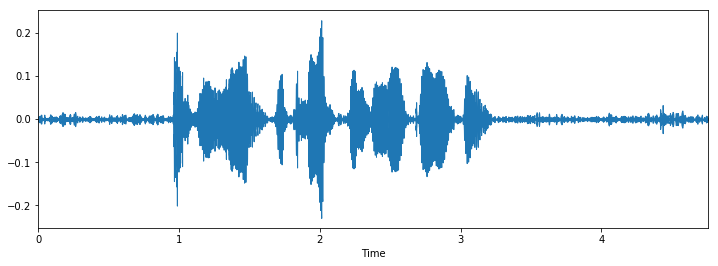

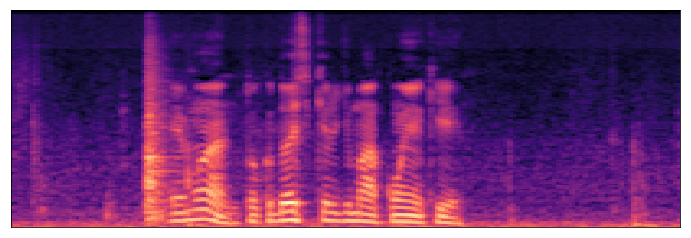

In [124]:
%pylab inline
import os
import pandas as pd
import librosa
import librosa.display
import glob

# Audio with expression "maconha" inside with another terms
data, sampling_rate = librosa.load('./teste4')

plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

S = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(S_dB, sr=sampling_rate)


## Unique "maconha" expression audio in waveplot and spectogram image 

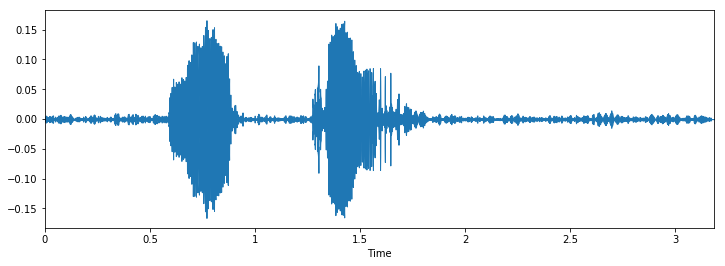

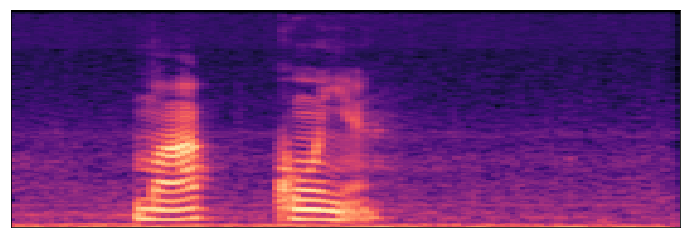

In [125]:
# an audio with an expression unique "maconha"
data, sampling_rate = librosa.load('./data/maconha/maconha-0a5388ecab714fab84f39b6948270fbe.wav')

plt.figure(figsize=(12,4))
librosa.display.waveplot(data, sr=sampling_rate)

S = librosa.feature.melspectrogram(y=data, sr=sampling_rate)
S_dB = librosa.power_to_db(S, ref=np.max)
plt.figure(figsize=(12,4))
librosa.display.specshow(S_dB, sr=sampling_rate)